# Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets

In [39]:
# Get your import statement here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import statistics
import scipy.stats
%matplotlib inline

In [11]:
# Load your dataset here

df_nyc = pd.read_csv('nyc-rolling-sales.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


In [5]:
#Let's view the top 5 rows of the dataset
df_nyc.head(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
#We can also veiw the bottom 5 rows of the dataset
df_nyc.tail(5)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [8]:
#To view the dimensions of the dataframe
df_nyc.shape

(84548, 22)

In [12]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
df_nyc.drop(['Unnamed: 0', 'EASE-MENT'], axis=1, inplace = True)

In [13]:
df_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [15]:
#First, let's check which columns should be categorical
print('Column name')
for col in df_nyc.columns:
    if df_nyc[col].dtype=='object':
        print(col, df_nyc[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [16]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df_nyc[col] = pd.to_numeric(df_nyc[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df_nyc[col] = df_nyc[col].astype('category')

df_nyc['SALE DATE'] = pd.to_datetime(df_nyc['SALE DATE'], errors='coerce')

In [17]:
missing = df_nyc.isnull().sum()/len(df_nyc)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_nyc.isnull().sum()[df_nyc.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)



In [18]:
print(df_nyc[(df_nyc['LAND SQUARE FEET'].isnull()) & (df_nyc['GROSS SQUARE FEET'].notnull())].shape)
print(df_nyc[(df_nyc['LAND SQUARE FEET'].notnull()) & (df_nyc['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values

In [19]:
#  Check for duplicates before

print(sum(df_nyc.duplicated()))

df_nyc[df_nyc.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,NaN,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,NaN,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76643,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50126,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12


The dataframe has 765 duplicated rows (exluding the original rows).

In [20]:
df_nyc.drop_duplicates(inplace=True)

print(sum(df_nyc.duplicated()))

0


## Exploratory data analysis

In [21]:
df_nyc[df_nyc['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.277500e+04,5.148300e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.136960e+03,2.340016e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929945e+04,1.182964e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.590000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.294000e+03,1.584000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.340000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,1.378125e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

In [22]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df_nyc[df_nyc['RESIDENTIAL UNITS']==0].describe()
# Graded-Funtion End

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,9.503000e+03,8.360000e+03,24546.000000,2.085500e+04
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,7.416797e+03,7.427346e+03,1675.525788,1.632257e+06
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,8.032892e+04,5.516541e+04,679.095000,1.969307e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.825000e+05
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.950000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.250000e+03,9.810000e+02,1962.000000,8.500000e+05
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,1.617206e+06,2017.000000,2.210000e+09


finding :
- zip code with 0 value ?
- year built with 0 value ?
- land and gross square feet with 0 value ?


In [28]:
# total value of borough
df_nyc['BOROUGH'].value_counts()

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

In [34]:
# calculate the mean for each Borough
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df_nyc.groupby('BOROUGH').mean()
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,1107.657938,749.190421,9912.565960,2.276931,0.280521,2.597227,5575.500562,34439.796285,1706.536902,3.344642e+06
2,4202.934372,298.625679,10360.980841,3.343580,0.160280,3.510152,3909.012725,4489.147412,1750.578067,5.946771e+05
3,4317.583484,339.525228,11072.688210,2.011618,0.145451,2.194229,2016.057333,2481.756365,1767.130185,8.410834e+05
4,6630.747589,230.493672,11300.423572,1.687283,0.190410,1.908920,4263.580512,3272.440270,1852.259982,7.388827e+05
5,3261.786162,198.775554,10047.136090,1.230111,0.080400,1.313163,8339.843259,2306.762002,1869.968177,5.436113e+05


In [35]:
# calculate the median for each Borough
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df_nyc.groupby('BOROUGH').median()
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,1170.0,1004.0,10022.0,0.0,0.0,1.0,2498.0,8120.0,1937.0,1155000.0
2,4177.5,47.0,10465.0,1.0,0.0,1.0,2375.0,1764.0,1932.0,274897.0
3,4558.0,50.0,11219.0,1.0,0.0,1.0,1800.0,1520.0,1930.0,425605.0
4,5900.0,40.0,11375.0,1.0,0.0,1.0,2767.5,1700.0,1945.0,495000.0
5,3024.0,56.0,10308.0,1.0,0.0,1.0,3700.0,1580.0,1973.0,465000.0


In [37]:
# calculate the mode for each Borough
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df_nyc.groupby('BOROUGH').agg(pd.Series.mode)
# Graded-Funtion End

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
BOROUGH,,,,,,,,,,,,,,,,,,,
1,UPPER EAST SIDE (59-79),13 CONDOS - ELEVATOR APARTMENTS,2,16,1,R4,169 WEST 95TH STREET,,10011,0,0,1,2523.0,112850.0,0,2,R4,10.0,2017-08-07
2,RIVERDALE,02 TWO FAMILY DWELLINGS,1,3944,1,D4,2287 JOHNSON AVENUE,,10462,1,0,1,0.0,0.0,0,1,D4,0.0,2017-06-29
3,BEDFORD STUYVESANT,02 TWO FAMILY DWELLINGS,1,2135,1,R4,429 KENT AVENUE,,11201,1,0,1,0.0,0.0,0,1,R4,0.0,2016-10-06
4,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,5066,1,A1,131-05 40TH ROAD,,11354,1,0,1,4000.0,1224.0,1920,1,A1,10.0,2016-11-10
5,GREAT KILLS,01 ONE FAMILY DWELLINGS,1,2450,1,A5,1235 FOREST HILL ROAD,,10314,1,0,1,4000.0,1200.0,1970,1,A5,10.0,2017-03-01


In [47]:
# calculate the Range for each Borough
# Write your function below

# Graded-Funtion Begin (~1 Lines)
(df_nyc.groupby('BOROUGH')['SALE PRICE'].max()) - (df_nyc.groupby('BOROUGH')['SALE PRICE'].min())
# Graded-Funtion End

BOROUGH
1    2.210000e+09
2    1.100000e+08
3    3.450000e+08
4    2.575000e+08
5    1.220000e+08
Name: SALE PRICE, dtype: float64

In [44]:
# calculate the Variance for each Borough
# Write your function below


# Graded-Funtion Begin (~1 Lines)
df_nyc.groupby('BOROUGH').var()
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,2.886372e+05,776690.497576,1.165824e+06,496.366872,39.571488,542.115484,2.708830e+08,1.405072e+10,420464.577474,5.827628e+14
2,1.116755e+06,574149.535826,1.069825e+06,498.684024,0.771532,514.454709,3.375209e+08,8.683572e+08,340594.440137,7.803693e+12
3,7.335413e+06,285379.149550,1.636403e+06,72.958719,2.704118,75.818955,7.882877e+07,2.210455e+08,313687.756141,1.561761e+13
4,1.872519e+07,243622.537761,8.162344e+05,328.621156,201.281217,535.806222,2.092770e+09,1.802261e+09,180710.056112,1.041624e+13
5,5.377588e+06,182550.857153,2.621956e+06,5.327995,3.972920,9.165570,7.797466e+09,1.888919e+08,186468.092538,3.631100e+12


In [48]:
# calculate the SD for each Borough
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df_nyc.groupby('BOROUGH').std(ddof=1)
# Graded-Funtion End

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BOROUGH,,,,,,,,,,
1,537.249675,881.300458,1079.733231,22.279292,6.290587,23.283374,16458.522686,118535.740373,648.432400,2.414048e+07
2,1056.766385,757.726557,1034.323430,22.331234,0.878369,22.681594,18371.742462,29467.900592,583.604695,2.793509e+06
3,2708.396811,534.208901,1279.219844,8.541588,1.644420,8.707408,8878.556905,14867.597573,560.078348,3.951912e+06
4,4327.260807,493.581339,903.456927,18.127911,14.187361,23.147488,45746.799583,42453.048394,425.100054,3.227420e+06
5,2318.962697,427.259707,1619.245590,2.308245,1.993219,3.027469,88303.260793,13743.796744,431.819514,1.905544e+06


## Probability Distribution

In [66]:
import seaborn as sns
sns.set(color_codes = True)
sns.set(rc={'figure.figsize':(5,5)})

from IPython.display import Math, Latex
from IPython.core.display import Image

from scipy.stats import uniform
from scipy.stats import norm

import statsmodels.api as sm

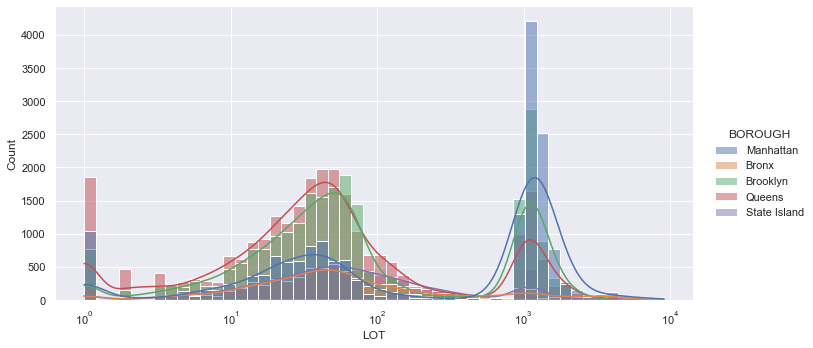

In [94]:
ax = sns.displot(
    data = df_nyc2,
    kind = 'hist',
    x = 'LOT',
    bins = 50,
    kde=True,
    hue='BOROUGH',
    aspect=2,
    log_scale=10
)

plt.show()

## analyze Confidence Intervals

In [61]:
# Write your function below
df_nyc2 = df_nyc.copy()
df_nyc2['BOROUGH'].replace({1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'State Island'}, inplace = True)
sale_price = df_nyc2[['BOROUGH', 'SALE PRICE']]
sale_price

,BOROUGH,SALE PRICE
0,Manhattan,6625000.0
1,Manhattan,NaN
2,Manhattan,NaN
3,Manhattan,3936272.0
4,Manhattan,8000000.0
...,...,...
84543,State Island,450000.0
84544,State Island,550000.0
84545,State Island,460000.0
84546,State Island,11693337.0


In [62]:
# mean, std, count, max, min table
sale_price.groupby('BOROUGH').agg({'SALE PRICE': ['mean', 'std', 'count', 'max', 'min']})

SALE PRICE                                        
                      mean           std  count           max  min
BOROUGH                                                           
Bronx         5.946771e+05  2.793509e+06   6994  1.100000e+08  0.0
Brooklyn      8.410834e+05  3.951912e+06  23843  3.450000e+08  0.0
Manhattan     3.344642e+06  2.414048e+07  14374  2.210000e+09  1.0
Queens        7.388827e+05  3.227420e+06  18410  2.575000e+08  1.0
State Island  5.436113e+05  1.905544e+06   5986  1.220000e+08  1.0

In [63]:
## overview :
Mean_Bronx = 594677 # <-- harga rata-rata
Std_Bronx = 279350 # <-- standard deviasi
Count_Bronx = 6994 # <-- jumlah total yang dijual
Max_Bronx = 110000000 # <-- penjualan termahal
Min_Bronx = 0 # <-- kemungkinan besar transfer dari orang tua ke anak
Z_score = 1.64 # <-- keyakinan 90%


In [64]:
# standard error
SE_Bronx = Std_Bronx / np.sqrt(Count_Bronx)
SE_Bronx

3340.3029854920414

In [65]:
Batas_Bawah_Bronx = Mean_Bronx - Z_score*SE_Bronx
Batas_Atas_Bronx = Mean_Bronx + Z_score*SE_Bronx
Batas_Bawah_Bronx, Batas_Atas_Bronx

(588130.0061484356, 601223.9938515644)

Berdasarkan keyakinan 90% bahwa harga jual property di Bronx berkisar antara $588130 - $601223

## Hypothesis Testing

In [78]:
# compare Bronx and Manhattan

nyc_bronx = df_nyc2[df_nyc2['BOROUGH']=='Bronx']
nyc_manhattan = df_nyc2[df_nyc2['BOROUGH']=='Manhattan']

n_bronx = len(nyc_bronx)
mean_bronx = nyc_bronx['SALE PRICE'].mean()
std_bronx = nyc_bronx['SALE PRICE'].std()

n_manhattan = len(nyc_manhattan)
mean_manhattan = nyc_manhattan['SALE PRICE'].mean()
std_manhattan = nyc_manhattan['SALE PRICE'].std()

print('BOROUGH', 'Total', 'Mean', 'STD DEV')
print('Bronx : ', n_bronx, mean_bronx, std_bronx)
print('Manhattan : ', n_manhattan, mean_bronx, std_bronx)

BOROUGH Total Mean STD DEV
Bronx :  6994 594677.118387189 2793509.0485762
Manhattan :  18102 594677.118387189 2793509.0485762


In [80]:
print(("zstat", "p-value"))
sm.stats.ztest(nyc_bronx["SALE PRICE"].dropna(), nyc_manhattan["SALE PRICE"].dropna(), alternative='two-sided')

('zstat', 'p-value')


(-9.495736658776908, 2.1865980196322893e-21)

- alpha = 0.5
- p-value sangat lebih kecil dari alpha
- reject null hypothesis

kesimpulan : harga jual di bronx dan manhattan adalah berbeda